<h1 style="color:MidnightBlue; opacity: 0.8; font-size:250%; text-align:center; border-radius:7px;">SPARK-NLP-@JohnSnowLabs <br>NLP Basics and Preprocess<br>(1st Notebook)</h1>

* [<span style="color:LightCoral"><font size="5">NLP Basic Concepts</font></span>](#0)

* [<span style="color:LightCoral"><font size="5">NLP Preprocess</font></span>](#1)

    - [<span style="color:#9C27B0; opacity:1"><font size="4">Lowercase</font></span>](#1.1)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">Tokenization</font></span>](#1.2)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">Removing Punctuation and Numbers</font></span>](#1.3)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">Removing Stopwords</font></span>](#1.4)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">Stemming and Lemmatization</font></span>](#1.5)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">Vectorization</font></span>](#1.6)
        - [<span style="opacity:1"><font size="3">Count Vectors (CountVectorizer)</font></span>](#1.6.1)
        - [<span style="opacity:1"><font size="3">Tf Idf Vectorizer</font></span>](#1.6.2)
        - [<span style="opacity:1"><font size="3">Word Embedding</font></span>](#1.6.3)<br><br>
        
    - [<span style="color:#9C27B0; opacity:1"><font size="4">Embeddings</font></span>](#1.7)
        - [<span style="opacity:1"><font size="3">Embedding Layer</font></span>](#1.7.1)
        - [<span style="opacity:1"><font size="3">Word2Vec</font></span>](#1.7.2)
            - [<span style="color:Black;"><font size="2.5">Skip-Gram Model </font></span>](#1.7.2.1)
            - [<span style="color:Black"><font size="2.5">Continuous Bag of Words (CBOW Model) </font></span>](#1.7.2.2)
        - [<span style="opacity:1;"><font size="3">Global Vectors (Glove)</font></span>](#1.7.3)
        - [<span style="opacity:1;"><font size="3">FastText</font></span>](#1.7.4)
        - [<span style="opacity:1;"><font size="3">Embeddings from Language Models (ELMo)</font></span>](#1.7.5)
        - [<span style="opacity:1"><font size="3">Bidirectional Encoder Representations from Transformers (BERT)</font></span>](#1.7.6)

# <center>NLP Basic Concepts<a id="0"> </a> <br><br><span style="color:BlueViolet">NLP Temel Terim ve Konseptler</span> 
    
- **Corpus :** Large and structured set of machine-readable texts that have been produced in a natural communicative setting. <br><span style="color:BlueViolet">Halihazırda kullandığımız, elimizin altındaki kütüphanedir.</span>
- **Corpora :**  Its plural form of corpus. <br><span style="color:BlueViolet">Birden fazla datasetin içerisinde bulunduğu kütüphanedir.</span>
- **Document :** A text object (Each line/row in the Corpus), the collection of which make up your corpus. Should be one word or one book. <br><span style="color:BlueViolet">Corpustaki her bir satırdır. Bir kelime de olabilir bir kitap da.</span>
- **Token :** A token is an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing. Should be word and sentence.<br><span style="color:BlueViolet">Document'teki, işlemlerimiz için yararlı bir anlamsal birim olarak gruplandırılmış bir karakter dizisinin bir örneğidir. En küçük parçadır. Word ve Sentence olarak ele alınabilir.</span>

- **Why we need Sentence Token? What is the difference between Word and Sentence Tokens?** <br> A sentence is split into tokens and vectorized. To treat them as sentences, we find the average of the vector values from those tokens. And this does not give us the exact sentence. But with some pretrained models, an entire sentence is vectorized. This is called a **sentence token** and is used to generate more **pristine/pure** data. **In summary;** The sentence token has been developed and used to obtain a context in terms of the sentence. <br><br><span style="color:BlueViolet">Bir cümle tokenlara ayrılır ve vektörleştirilir. Bunları cümle olarak ele almak için o token lardan vektör değerlerinin ortalamasını buluruz. Ve bu birebir cümleyi bizlere vermez. Ama bazı pretrained modeller ile bütün bir cümle vektör haline getirilmiştir. Bu sentence token olarak adlandırılır ve daha bozulmamış bir veri üretmek için kullanılır. Özetle; cümle bakımından bir bağlamı elde etmek için sentence token geliştirilmiştir ve kullanılır.</span>

# <center>NLP Preprocess <a id="1"> </a><br><br><span style="color:BlueViolet">NLP Ön Hazırlık</span>
    
- **1) Lowercase (for ML models):<a id="1.1"> </a><br>** All sentences are converted to lowercase. if the same word starts with both lowercase and uppercase letters, Countvectorizer and TF-IDF will treat these words as two different words. We are doing this process for ML models. **Note :** Sometimes this is not necessary for spark nlp. Because the word which starting with uppercase may be a Company/Organization name or Proper noun.  <br><br> <span style="color:BlueViolet">Bütün cümleler küçük harfe çevrilir. Eğer aynı kelime hem küçük harf ve hem de büyük harfle başlıyorsa Countvectorizer ve TF-IDF bu kelimeleri farklı iki kelime olarak ele alacaktır. Bunu makine öğrenmesi algoritmaları için yapıyoruz. **Note :** Bazen bu, spark nlp için gerekli değildir. Çünkü büyük harfle başlayan kelime Şirket/Kuruluş adı veya Özel isim olabilir.</span>
    
- **2) Tokenization :<a id="1.2"> </a><br>** It is the process of breaking up a sentence, paragraph, phrase or text into small parts. Each word or phrase is considered as a token. The word token is more commonly used. <br><br> <span style="color:BlueViolet">Bir cümleyi, paragrafı, söz öbeğini veya metni küçük parçalara bölme işlemidir. Her bir kelime veya cümle bir token olarak kabul edilir. Word token daha yaygın olarak kullanılır.</span>
    
- **3) Removing Punctuation and Numbers (for ML models (CountVec-TF_IDF), not for Spark and DL) :<a id="1.3"> </a><br>** Removing everything excepts string. This steps is for ML. For Spark, we can not remowe numbers, because may be they represents clients' age and their medicines' dosage. <br><br> <span style="color:BlueViolet">String ifade hariç her şeyi kaldırmak. Bu adımlar ML içindir. Spark için sayıları silemeyiz, çünkü bunlar müşterilerin yaşını ve ilaçlarının dozunu temsil ediyor olabilir.</span>
    
- **4) Removing Stopwords :<a id="1.4"> </a><br>** These are words that are used a lot in a language and that do not contribute to the training of our models. These can be conjunctions, adverbs and suffixes. And they cause noise. **For example**, if we see that unnecessary words are assigned to a label in our model, we can define these words as stopwords and delete them from our dataset. **For sentiment analysis**, we need to consider and analyse too much on here.<br><br> <span style="color:BlueViolet">Bir dilde çok kullanılan ve modellerimiz eğitmede katkısı olmayan kelimelerdir. Bunlar bağlaç, zarf ve ekler olabilir. Ve gürültüye neden olurlar. **Örneğin** modelimizde gereksiz kelimelerin bir label a atandığını görürsek, bu kelimeleri stopwords olarak tanımlayıp verisetimizden silebiliriz. **Duygu analizi için** burada çok fazla düşünmemiz ve analiz etmemiz gerekiyor.*/span>
    
- **5) Stemming and Lemmatization :<a id="1.5"> </a><br>** **Stemming** just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling. **Lemmatization** considers the context and converts the word to its meaningful base form, which is called Lemma. The word obtained has an equivalent in the dictionary. Sometimes, the same word can have multiple different Lemmas. **For example :** 'drove'. If the stemming will applied, the word will be 'drive'. But for lemma, this word has a meaning in dict. <br><br> <span style="color:BlueViolet">**Stemming**, bir kelimenin son birkaç karakterini kaldırır veya köklendirir, bu da genellikle yanlış anlamlara ve yazımlara yol açar.**Lemmatizasyon**, bağlamı dikkate alır ve kelimeyi Lemma adı verilen anlamlı temel formuna dönüştürür. Elde edilen kelimenin sözlükte karşılığı vardır. Bazen aynı kelimenin birden fazla farklı Lemması olabilir. Lemma, Türkçe ifade edecek olursak; çekim ekimlerini atar ama yapım eklerini ellemez. Stem ise küke kadar iner. </span>
    
- **6) Vectorization :<a id="1.6"> </a>**
    - **Count Vectors (CountVectorizer) :<a id="1.6.1"> </a>**<br>Combines documents and detects all unique words. He puts these words in alphabetical order and counts the number of times each of them occurs. And it gives weight to the words according to these numbers. **It gives the same weight to words that occur the same number of times. Does not provide insights.** <br><br><span style="color:BlueViolet">Documentleri birleştirir ve bütün unique kelimeleri tespit eder. Bu kelimeleri alfabetik sıraya koyar ve her birisinin kaş defa geçtiğini sayar. Ve bu sayılara göre kelimellere ağırlık verir. Aynı sayıda geçen kelimelere aynı ağırlığı verir. Bize bir insight vermez.</span><br><br>
    - **Tf Idf Vectorizer :<a id="1.6.2"> </a>**<br>**Tf means;** term frequency. Number of a word in document / number of all words in document. <br>**Idf means;** inverse document frequency. The number of documents the word is in / the number of all documents in the corpus.<br>inverse reverses this operation. Because the logarithm of numbers between 0 and 1 is negative.<br><br><span style="color:BlueViolet">**Tf açılımı;** term frequency/ terim sıklığı. Bir kelimenin document teki sayısı / document teki tüm kelime sayısı. <br>**Idf açılımı;** inverse document frequency/ belge sıklığı. Kelimenin içinde olduğu document sayısı / corpustaki tüm document sayısı.<br>inverse ise bu işlemin tersini alır. Çünkü 0 ve 1 arasındaki sayıları logaritması negatiftir. </span><br><br> 
    ___
    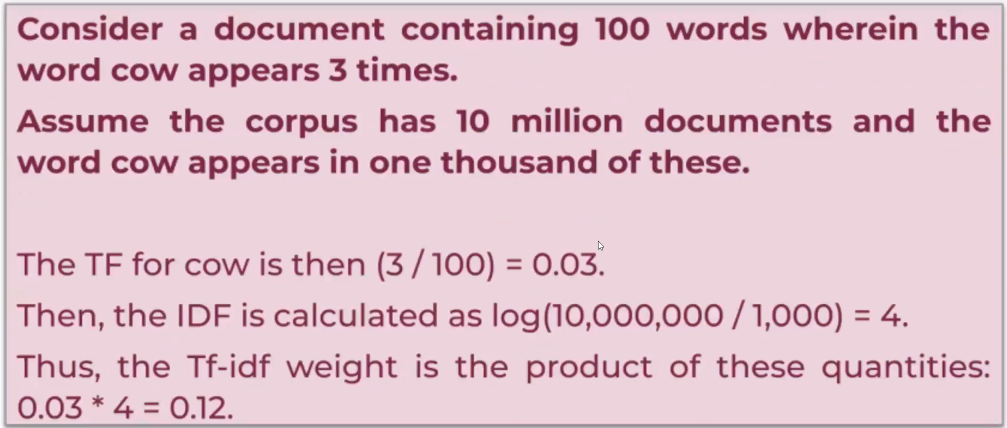<br>
    ___ 
    - **Word Embedding :<a id="1.6.3"> </a>** <br>CountVectorizer and TF_IDF cannot detect the semantic integrity of words. <br>Also, the size of our vectors is very large (ie we have as many vectors as the number of unique tokens). Most values are 0's. <br> WordEmbedding measures how much cosine similarity is between tokens. <br>Cosine Similarity; is the cosine of the angle between two vectors. Cos(0) = 1. <br>The closer the cosine similarity value is to 1, the greater the semantic relationship. <br><br><span style="color:BlueViolet">CountVectorizer ve TF_IDF kelimelerin anlamsal bütünlüğünü tespit edemiyor. <br>Ayrıca bunlarda vektörlerimizin boyutu çok büyüktür (yani unique token sayısı kadar vektörümüz vardır). Çoğu değerler de 0 lardan oluşuyor. <br> WordEmbedding tokenlar arası anlam bütünlüğünün ne kadar olduğunu cosine similarity ile ölçer. <br>Cosine Similarity; iki vektör arasındaki açının kosinüs değeiridir. Cos(0) = 1. <br>Cosine similarity değeri 1 e yaklaştıkça anlam ilişkisi o kadar artar.</span><br><br>
    
- **7) Embeddings :<a id="1.7"> </a>**
    - **Embedding Layer :<a id="1.7.1"> </a>** It is the model created manually in DL models.
    - <span style="color:BlueViolet">**Embedding Layer :** DL modellerinde manual olarak oluşturulan modeldir.</span>
    - **Word2Vec :<a id="1.7.2"> </a>** Developed by Google. By scanning all the words in the given text, it finds a semantic relationship by looking at the words before and after each word.
    - <span style="color:BlueViolet">**Word2Vec :** Google tarafından geliştirilmiştir. Verilen metindeki kelimelerin tamamını tarayarak her bir kelimenin öncesi ve sonrasındaki kelimelere bakarak anlamsal bir ilişki buluyor.</span>
        - **Skip-Gram Model :<a id="1.7.2.1"> </a>** Target word is given as input in skip gram. But as output, there are words to the right and left of the target word. It is aimed to represent the inputs and outputs in the most appropriate way in terms of probabilistic analogy. It's is effective in small corpus.
        - <span style="color:BlueViolet">**Skip-Gram Model :** Skip gramda girdi olarak hedef kelime verilir. Ama çıktı olarak ise hedef kelimenin sağındaki ve solundaki kelimeler vardır. Girdiler ve çıktıları olasılıksal olarak birbirine benzeterek anlamasal olarak en uygun şekilde temsil edilmek amaçlanır. Küçük corpuslarda çok etkilidir.</span>
        - **Continuous Bag of Words (CBOW Model) :<a id="1.7.2.2"> </a>** Very similar to SkipGram model. Only difference; input and output swap places. If words around a target word are taken as input, it tries to find out which word will most likely be seen as the target word. Effective in large corpus.
        - <span style="color:BlueViolet">**Continuous Bag of Words (CBOW Model) :** SkipGram modele çok benzer. Tek fark; giriş ve çıkış yer değiştirir. Bir hedef keimmenin etrafındaki kelimeler verildiğinde, hangi kelimenin yüksek olasılıkla hedef kelime olarak görüleceğini bulmaya çalışır. Büyük corpuslarda etkilidir.</span><br>
        ___
        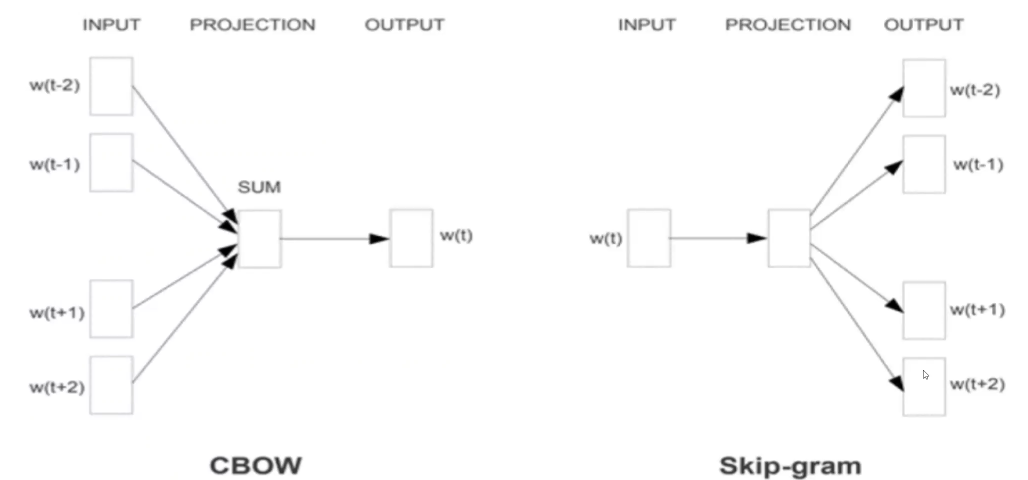 
        ___
        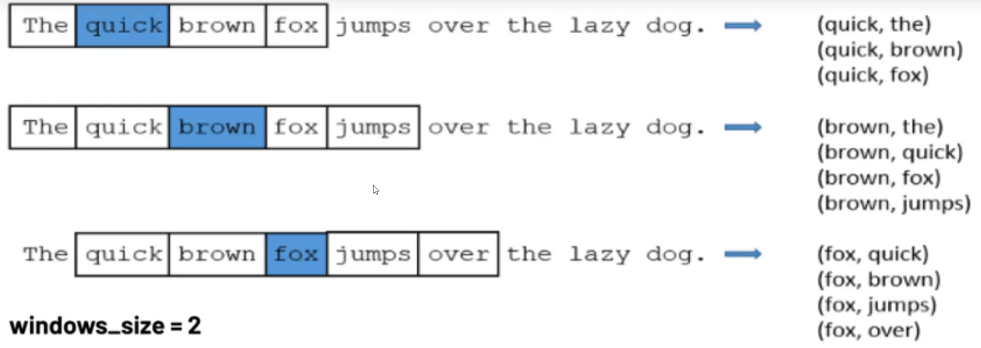<br>
        ___
    - **Global Vectors (Glove) :<a id="1.7.3"> </a>** It is different from Word2Vec. It's based on words that are used together in pairs (as in Word2Vec), and calculates how much they are used in the corpus. It does statistical calculations and determines vector values. Word2Vec counted all the words and the vector value was constantly updated as it found the words used together.
    - <span style="color:BlueViolet">**Global Vectors (Glove) :**  Word2Vec'ten farklıdır. İkili olarak birlikte kullanılan kelimeleri (Word2Vec'teki gibi) baz alıyor, ve bunların corpusta ne kadar kullanıldığını hesaplıyor. İstatsitiksel hesap yapıyor ve vektör değerlerini belirliyor. Word2Vec bütün kelimeleri sayıyordu ve birlikte kullanılan kelimeleri buldukça vektör değeri sürekli güncelleniyordu.</span>
    - **FastText :<a id="1.7.4"> </a>** Developed by Facebook in 2016. It is an extension of Word2Vec. It treats words in chunks based (before+target+after, 3 words) on several letters/words (i.e. n-grams) rather than assigning words individually to neural networks.
    - <span style="color:BlueViolet">**FastText :** 2016 yılında Facebook tarafından geliştirildi. Word2Vec in bir uzantısıdır. Kelimeleri tek tek neural network ağlarına vermektense kelimeleri birkaç harf/kelime bazlı (yani n-gram olarak) parçalar halinde ele alır.</span>
    - **Embeddings from Language Models (ELMo) :<a id="1.7.5"> </a>** It can catch the meaning differences of homophones. Because Word2Vec and Glove were unidirectional models, they gave homonyms the same vector value. ELMo is a bidirectional language model (biLM). Therefore, it gives very successful results for NER models.
    - <span style="color:BlueViolet">**Embeddings from Language Models (ELMo) :** Sesteş kelimelerin anlam farklılıklarını yakalayabiliyor. Word2Vec ve Glove tek yönlü modeller olduğu için sesteş kelimelere aynı vektör değerini veriyordu. ELMo ise bidirectional language model dir (biLM). Bu yüzden NER modelleri için çok başarılı sonuçlar verir.</span>
    - **Bidirectional Encoder Representations from Transformers (BERT) :<a id="1.7.6"> </a>** Unlike other models, ELMo and BERT evaluate the sentence in 2 directions, both from right to left and from left to right. In this way, these models plan to better understand the meaning and the relations of words with each other.
     - <span style="color:BlueViolet">**Bidirectional Encoder Representations from Transformers (BERT) :** Diğer modellerden farklı olarak ELMo ve BERT cümleyi hem sağdan sola hem de soldan sağa olarak 2 yönlü değerlendirir. Bu sayede anlamı ve kelimelerin birbirleri ile olan ilişkilerini daha iyi çıkarmayı planlar.</span>
    ___
    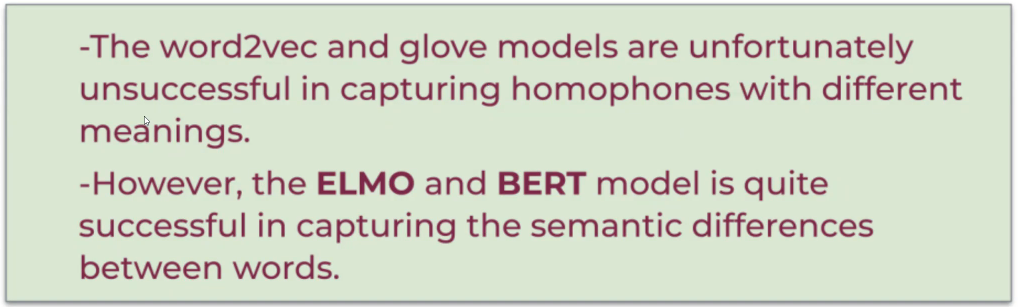
    ___  